# Simple Linear Regression

In this notebook, we will be building a linear regression model to predict `sales` using an appropriate predictor variable.

1. Reading and understanding the Data
2. Training the model
3. Residual Analysis
4. Predicting and evaluating on the test set

## Step 1: Reading and Understanding the Data

Let's start with the following steps:

1. Importing data using the pandas library
2. Understanding the structure of the data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the data
advertising = pd.read_csv("advertising.csv")
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
advertising.shape

(200, 4)

In [4]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [10]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


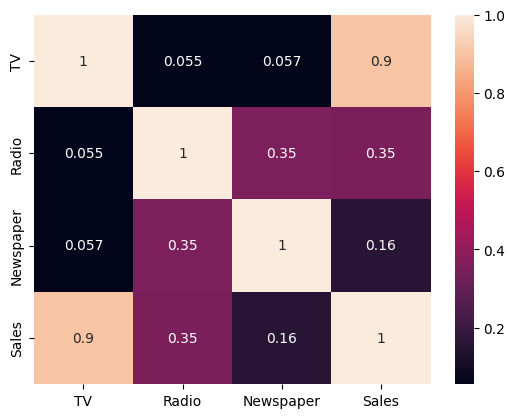

In [12]:
sns.heatmap(advertising.corr(), annot=True)
plt.show()

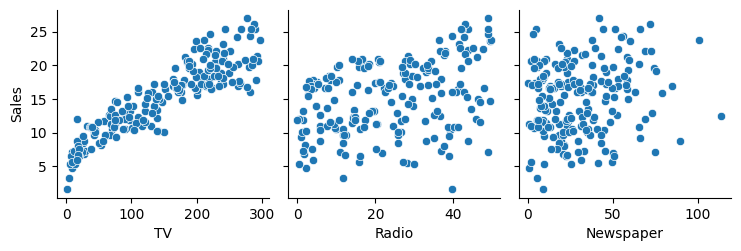

In [21]:
# visualizing the data
sns.pairplot(data=advertising, x_vars=["TV", "Radio", "Newspaper"], y_vars="Sales")
plt.show()

Step 2: Performing Simple Linear Regression

Equation of linear regression
y = c + m1x1 + m2x2 +...+mnxn

- y is the response
- c is the intercept
- m1 is the coefficient for the first feature
- mn is the coefficient of the nth feature

In our case:
y = c + m1 x TV

The m values are called the model coeffients or model parameters.

Steps:
- Create X and y
- Create train and test sets (70-30, 80-20)
- Train your model on the training set (i.e. learn the coefficients)
- Evaluate the model (training set, test set)

In [13]:
# Create X and y
X = advertising['TV']
y = advertising['Sales']

In [23]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=100)

In [32]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(140,)
(60,)
(140,)
(60,)


In [36]:
# training the model
# y = c + m1.X1
# y = c.const(X0) + m1.TV


X_train_sm = sm.add_constant(X_train)
X_train_sm.head()

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3


In [37]:
# fitting the model
lr = sm.OLS(y_train, X_train_sm) # it will create an object
lr_model = lr.fit()
lr_model.params

const    6.948683
TV       0.054546
dtype: float64

Sales = 6.94 + 0.05.TV

The coefficient of TV is 0.05 its positive because sales increase as the TV increases.  

If you increase the amount money spent on TV by 1 unit the sales will increate by 0.05 unit.

The intersept is positive which means that when you spent 0$ on TV the sales will be 6.9.

Here, OLS stands for Ordinary Least Squares, which is the method that 'statsmodels' use to fit the line. You use the command 'add_constant' so that statsmodels also fits an intercept. If you don't use this command, it will fit a line passing through the origin by default.

In [39]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Sat, 13 Jul 2024   Prob (F-statistic):           1.52e-52
Time:                        08:05:07   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The above detailed summary is only provided in Statsmodels API not in sklearn.

After looking at the coefficient and the P-values we can say that the relationship between X and Y is statically significant not by chance.

In [43]:
# 1. Coef and p-value
# 2. R-squared is 81.6%, very high => we can say 81% of variance in sales is explained by Variable TV.
# 3. P(F-statistic) is low => the fit is not by chance

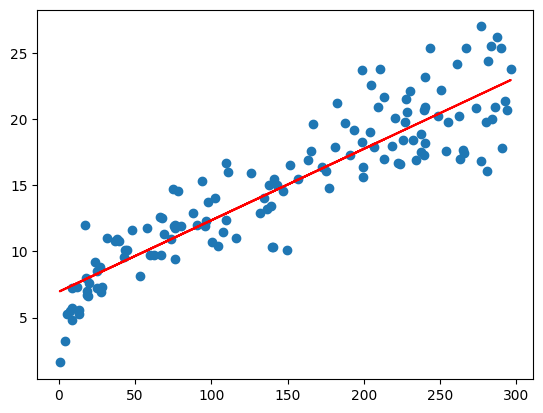

In [47]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'r')
plt.show()

## Step 3: Residual Analysis

In [48]:
# error = f(y_train, y_train_pred) => y_train_pred is (6.948 + 0.054*X_train)

In [49]:
y_train_pred = lr_model.predict(X_train_sm)
y_train_pred

74     18.588747
3      15.212365
185    18.130563
26     14.743271
90     14.274178
         ...    
87     12.986898
103    17.197830
67     14.546907
24     10.346884
8       7.417777
Length: 140, dtype: float64

In [50]:
res = y_train - y_train_pred

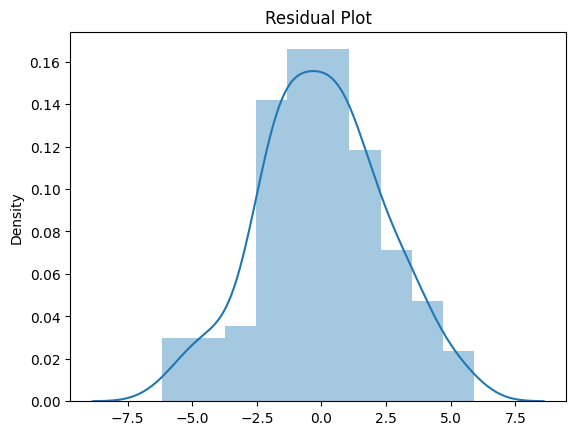

In [56]:
# plotting the residuals
plt.figure()
sns.distplot(res)
plt.title("Residual Plot")
plt.show()

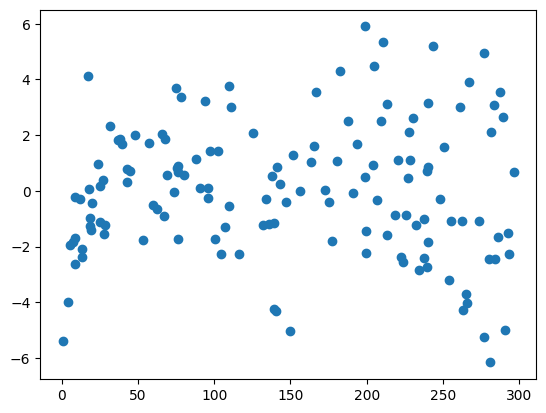

In [59]:
# look for patterns in residuals (we should not be able to identify any solid patterns)
plt.scatter(X_train, res) # Here we have just taken a value from the X_train and plot its residual

## Step 4: Predictions and Evaluation on the Test Set

In [61]:
# Prediction on the test set (y_test_pred)
# evaluate the model, r-squared on the test

In [65]:
# add a const/intercept to test
X_test_sm = sm.add_constant(X_test)

# pred on test
y_test_pred = lr_model.predict(X_test_sm)

In [66]:
# evaluate the model, r-squared on the test
r2 = r2_score(y_true=y_test, y_pred=y_test_pred)
r2

0.792103160124566

In [67]:
# r2 on train
r2_score(y_true=y_train, y_pred=y_train_pred)

0.8157933136480389

In [68]:
# mean squared error
mean_squared_error(y_true=y_test, y_pred=y_test_pred)

4.077556371826953

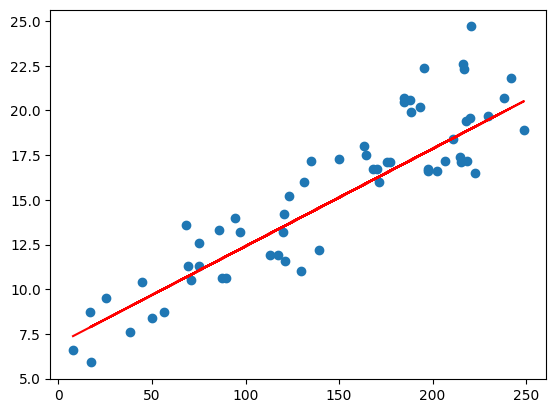

In [70]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()